In [1]:
import numpy as np
import pandas as pd
from Bio import SeqIO

from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection

In [2]:
genomic = './sars_cov2_spike_aligned/sars_cov2_spike_aligned.fasta'
report = './sars_cov2_spike/sars_cov2_spike.csv'

In [3]:
sequences = {}
for seq_record in tqdm(SeqIO.parse(genomic, 'fasta')):
    if len(seq_record.seq) == 3822 and (set(seq_record.seq)<=set(['A','T','C','G','-','N','n'])):
        sequences[seq_record.id] = seq_record.seq

110625it [06:12, 297.12it/s]


In [4]:
df = pd.read_csv(report)
df = df[df.Accession.isin(sequences.keys())]
df = df.sort_values(by='ReleaseDate', ascending=True).reset_index()

In [5]:
df.head()

,index,Accession,ReleaseDate,PangoClass,Location,Length,Gene,Protein,Begin,End,CDS_Length
0,0,NC_045512.2,2020-01-13,B,China,29903,S,surface glycoprotein,21563,25384,3822
1,1,MW422255.1,2020-12-30,alpha,"USA: San Diego, California",29763,S,surface glycoprotein,21500,25312,3813
2,2,MW422256.1,2020-12-30,alpha,USA,29817,S,surface glycoprotein,21524,25336,3813
3,3,MW430966.1,2021-01-04,alpha,USA: California,29835,S,surface glycoprotein,21523,25335,3813
4,4,MW430974.1,2021-01-04,alpha,USA: Florida,29861,S,surface glycoprotein,21551,25363,3813


In [6]:
accession_list = df.Accession.tolist()
accession_list.remove('NC_045512.2')
len_acc = len(accession_list)
refseq = sequences['NC_045512.2']

Beta: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 359/359 [00:03<00:00, 90.70it/s]


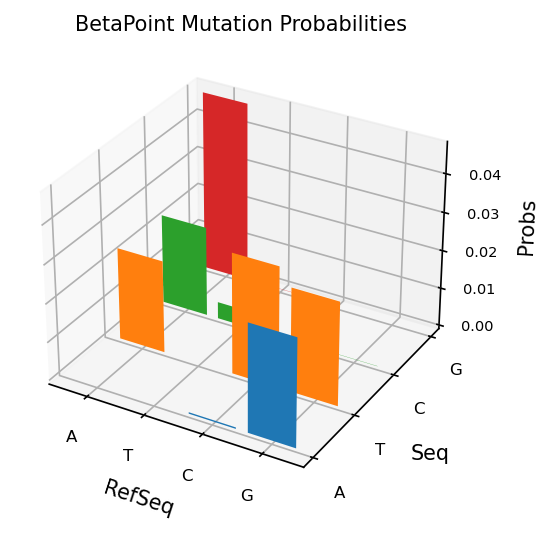

Gamma:  12%|███████████▊                                                                                         | 647/5553 [00:05<00:41, 116.96it/s]


KeyboardInterrupt: 

In [36]:
basedict = {
    'A': 0, 'T': 1, 'C': 2, 'G': 3
}
ticks = ['A','T','C','G']

for var in ['Beta','Gamma','Delta','Lambda']:
    changes = np.zeros((5,5))
    for i in tqdm(df[df.PangoClass==var].index, desc=var.capitalize()):
        acc = df.iloc[i].Accession
        seq = sequences[acc]
        for j in range(3822):
            if seq[j]!=refseq[j]:
                x = basedict[refseq[j]] if refseq[j] in basedict.keys() else 4
                y = basedict[seq[j]] if seq[j] in basedict.keys() else 4
                changes[x,y] += 1
    changes = changes/np.sum(changes)
    fig = plt.figure(dpi=150)
    ax = fig.add_subplot(projection='3d')
    for x in range(4):
        ys = np.arange(4)
        xs = changes[:,x][:4]
        ax.bar(ys, xs, zs=x, zdir='y')
    ax.set_xlabel('RefSeq')
    ax.set_ylabel('Seq')
    ax.set_zlabel('Probs')
    ax.set_xticks(range(4),ticks,fontsize=8)
    ax.set_yticks(range(4),ticks,fontsize=8)
    plt.setp(ax.get_zticklabels(),fontsize=7)
    plt.title(var.capitalize()+'Point Mutation Probabilities', fontsize=10)
    plt.show()

Lambda: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 334/334 [00:01<00:00, 285.48it/s]


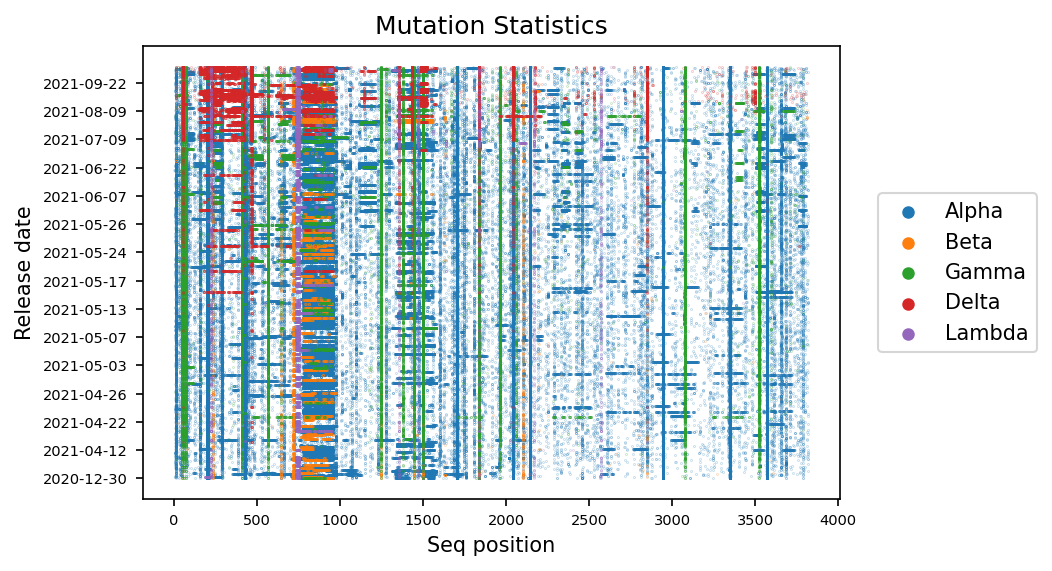

In [44]:
plt.figure(dpi=150)

for var in ['alpha','Beta','Gamma','Delta','Lambda']:
    x, y = [], []
    for i in tqdm(df[df.PangoClass==var].index, desc=var.capitalize()):
        acc = df.iloc[i].Accession
        seq = sequences[acc]
        for j in range(3822):
            if seq[j]!=refseq[j]:
                x.append(j)
                y.append(i)
    plt.scatter(x=x,y=y,label=var.capitalize(),cmap='Set1',s=0.01)

def update_scatter(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([25])

plt.title('Mutation Statistics')
yticks = range(1,len_acc+1,7500)
ylabels = [df.iloc[k].ReleaseDate for k in yticks]
plt.yticks(yticks,ylabels,fontsize=7)
plt.xticks(fontsize=7)
plt.legend(handler_map={PathCollection: HandlerPathCollection(update_func=update_scatter)},
           bbox_to_anchor=(1.04,0.5),loc='center left')
plt.xlabel('Seq position')
plt.ylabel('Release date')
plt.show()

Lambda: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 334/334 [00:01<00:00, 283.05it/s]


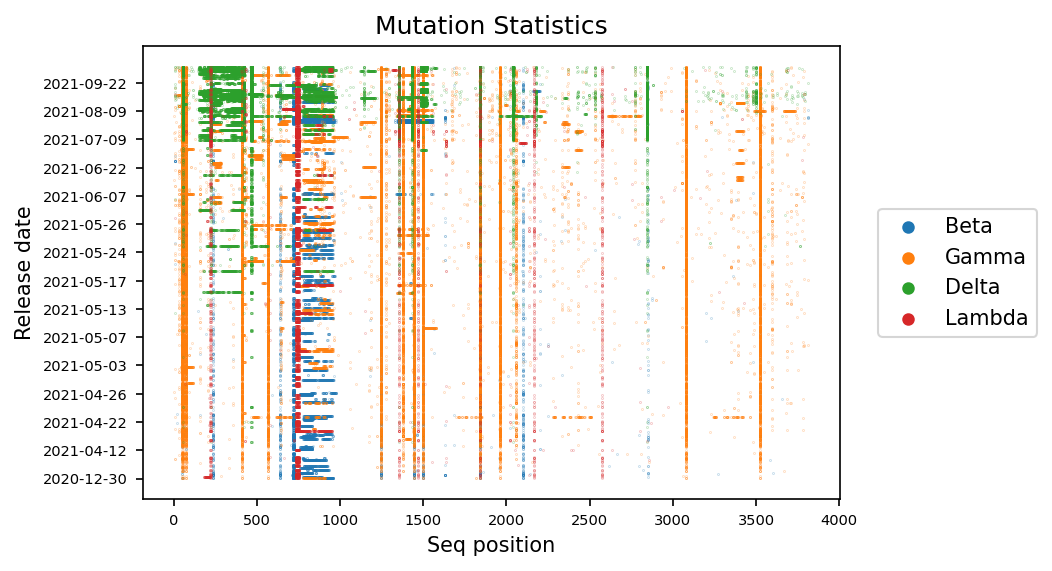

In [45]:
plt.figure(dpi=150)

for var in ['Beta','Gamma','Delta','Lambda']:
    x, y = [], []
    for i in tqdm(df[df.PangoClass==var].index, desc=var.capitalize()):
        acc = df.iloc[i].Accession
        seq = sequences[acc]
        for j in range(3822):
            if seq[j]!=refseq[j]:
                x.append(j)
                y.append(i)
    plt.scatter(x=x,y=y,label=var.capitalize(),cmap='Set1',s=0.01)

def update_scatter(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([25])

plt.title('Mutation Statistics')
yticks = range(1,len_acc+1,7500)
ylabels = [df.iloc[k].ReleaseDate for k in yticks]
plt.yticks(yticks,ylabels,fontsize=7)
plt.xticks(fontsize=7)
plt.legend(handler_map={PathCollection: HandlerPathCollection(update_func=update_scatter)},
           bbox_to_anchor=(1.04,0.5),loc='center left')
plt.xlabel('Seq position')
plt.ylabel('Release date')
plt.show()